In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
meldf = pd.read_csv("melb_data.csv", index_col=0)
meldf.head(5)


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [33]:
meldf.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,18396.000000,1.839600e+04,18395.000000,18395.000000,14927.000000,14925.000000,14820.000000,13603.000000,7762.000000,8958.000000,15064.000000,15064.000000,18395.000000
mean,2.935040,1.056697e+06,10.389986,3107.140147,2.913043,1.538492,1.615520,558.116371,151.220219,1965.879996,-37.809849,144.996338,7517.975265
std,0.958202,6.419217e+05,6.009050,95.000995,0.964641,0.689311,0.955916,3987.326586,519.188596,37.013261,0.081152,0.106375,4488.416599
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.330000e+05,6.300000,3046.000000,2.000000,1.000000,1.000000,176.500000,93.000000,1950.000000,-37.858100,144.931193,4294.000000
50%,3.000000,8.800000e+05,9.700000,3085.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.803625,145.000920,6567.000000
75%,3.000000,1.302000e+06,13.300000,3149.000000,3.000000,2.000000,2.000000,651.000000,174.000000,2000.000000,-37.756270,145.060000,10331.000000
max,12.000000,9.000000e+06,48.100000,3978.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [2]:
meldf.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [2]:
meldf = meldf.dropna(axis=0)
meldf.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,6196.000000,6.196000e+03,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.068828e+06,9.751097,3101.947708,2.902034,1.576340,1.573596,471.006940,141.568645,1964.081988,-37.807904,144.990201,7435.489509
std,0.971079,6.751564e+05,5.612065,86.421604,0.970055,0.711362,0.929947,897.449881,90.834824,38.105673,0.075850,0.099165,4337.698917
min,1.000000,1.310000e+05,0.000000,3000.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1196.000000,-38.164920,144.542370,389.000000
25%,2.000000,6.200000e+05,5.900000,3044.000000,2.000000,1.000000,1.000000,152.000000,91.000000,1940.000000,-37.855438,144.926198,4383.750000
50%,3.000000,8.800000e+05,9.000000,3081.000000,3.000000,1.000000,1.000000,373.000000,124.000000,1970.000000,-37.802250,144.995800,6567.000000
75%,4.000000,1.325000e+06,12.400000,3147.000000,3.000000,2.000000,2.000000,628.000000,170.000000,2000.000000,-37.758200,145.052700,10175.000000
max,8.000000,9.000000e+06,47.400000,3977.000000,9.000000,8.000000,10.000000,37000.000000,3112.000000,2018.000000,-37.457090,145.526350,21650.000000


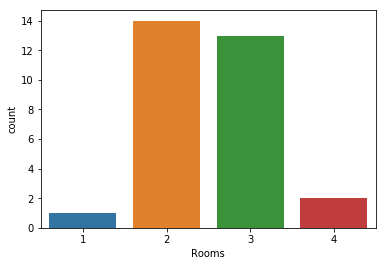

In [5]:
sns.countplot(meldf['Rooms'].head(30))

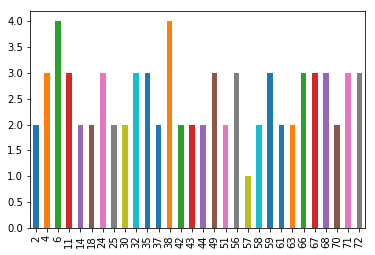

In [18]:
meldf['Rooms'].head(30).plot.bar()   #YearBuilt

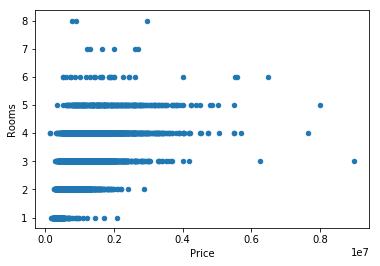

In [22]:
meldf.plot.scatter(x='Price',y='Rooms')

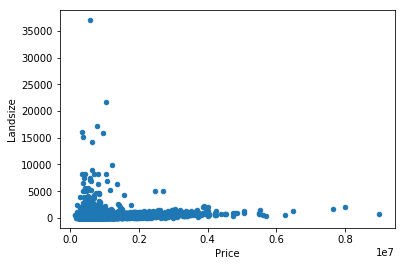

In [23]:
meldf.plot.scatter(x='Price',y='Landsize')

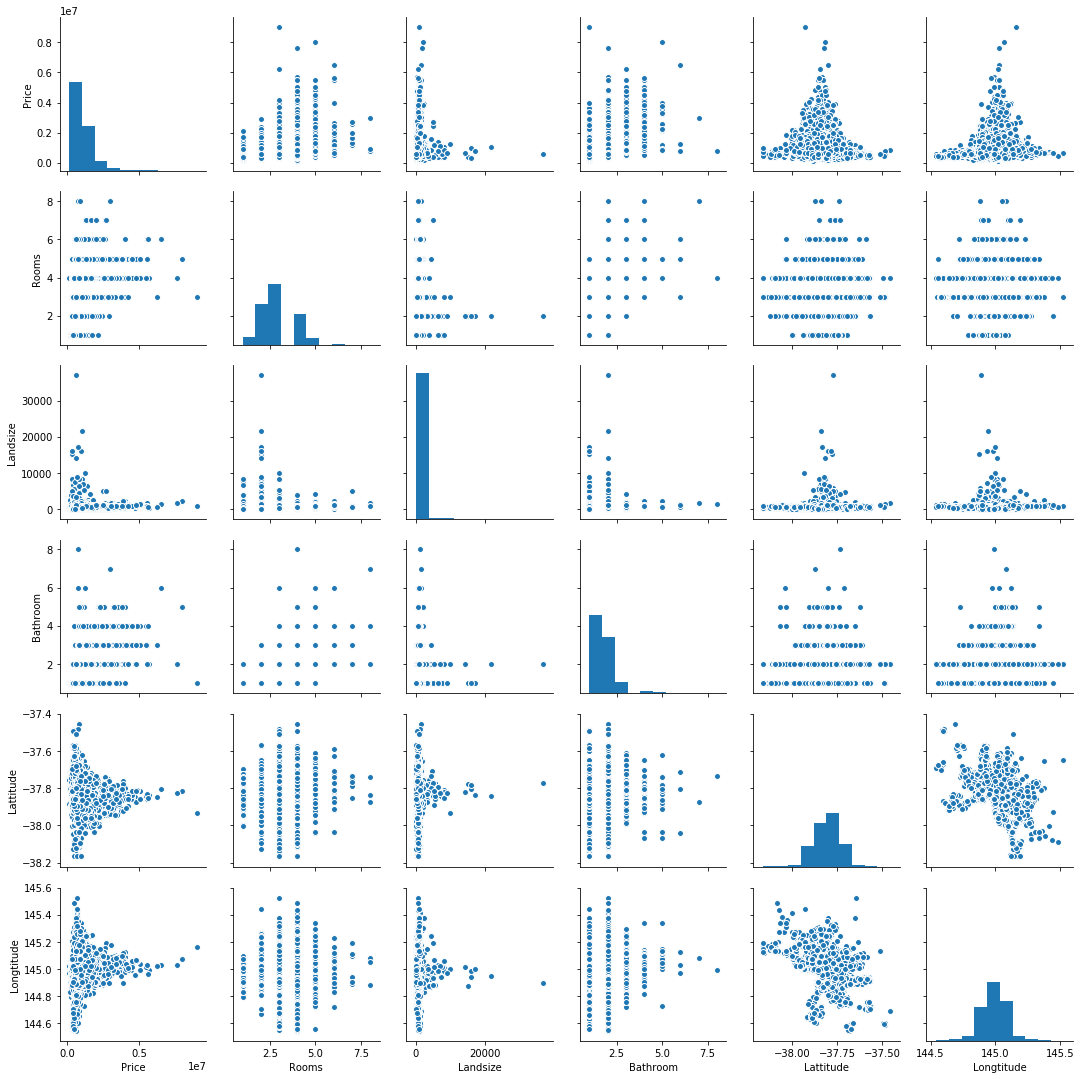

In [39]:
sns.pairplot(meldf[['Price','Rooms','Landsize','Bathroom','Lattitude', 'Longtitude']])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027EF4EC4208>,
      dtype=object)

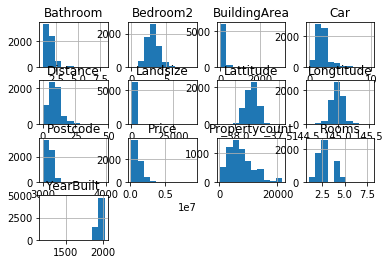

In [9]:
meldf.hist()

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027EF5339A20>,
      dtype=object)

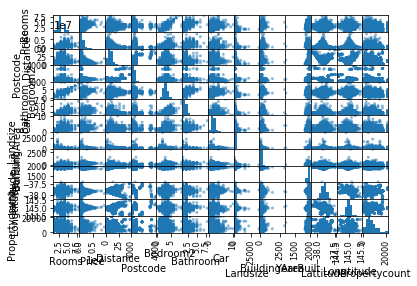

In [11]:
pd.scatter_matrix(meldf)

In [7]:
#sns.lmplot(x='Rooms',y='Landsize', hue='Price', fit_reg=False, data=meldf)

In [3]:
y = meldf.Price
y.head()

2     1035000.0
4     1465000.0
6     1600000.0
11    1876000.0
14    1636000.0
Name: Price, dtype: float64

In [5]:
x = meldf[['Rooms', 'Bathroom', 'Bedroom2','BuildingArea','YearBuilt']]
x.describe()
plots = meldf[['Price','Rooms', 'Bathroom', 'Landsize','YearBuilt', 'Lattitude', 'Longtitude']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B228F0BF60>,
      dtype=object)

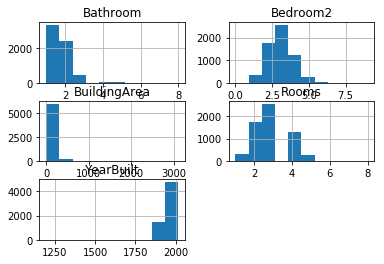

In [6]:
x.hist()

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027EFFA00080>,
      dtype=object)

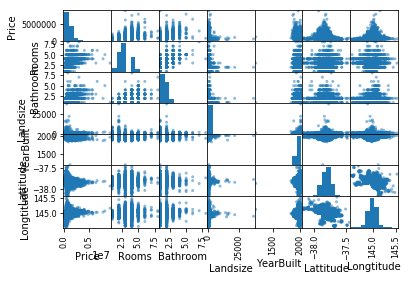

In [55]:
pd.scatter_matrix(plots)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000027EFF1A0BA8>,
      dtype=object)

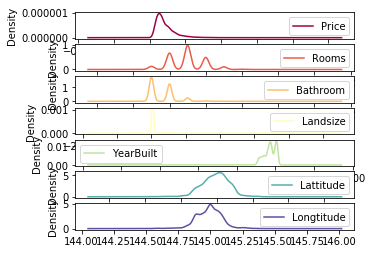

In [32]:
plots.plot(kind='density',subplots=True, sharex=False, sharey=False, figsize=(5,4), colormap='Spectral')

In [7]:
corln = meldf.corr()['Price']
print(corln)

Rooms            0.533505
Price            1.000000
Distance        -0.148867
Postcode         0.125539
Bedroom2         0.514561
Bathroom         0.503922
Car              0.261507
Landsize         0.081419
BuildingArea     0.530574
YearBuilt       -0.304633
Lattitude       -0.213574
Longtitude       0.211760
Propertycount   -0.046410
Name: Price, dtype: float64


(0, 10.286075320192406)

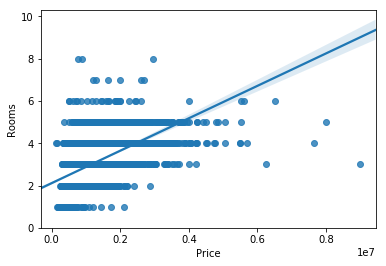

In [57]:
sns.regplot(x='Price',y='Rooms',data=meldf)
plt.ylim(0)

In [8]:
from sklearn.model_selection import train_test_split
x_tr,x_tes,y_tr,y_tes = train_test_split (x,y,test_size=0.25, random_state =0)


In [10]:

# Define model. Specify a number for random_state to ensure same results each run
model = LinearRegression()

# Fit model
model.fit(x_tr, y_tr)
coeff_df = pd.DataFrame(model.coef_,x.columns,columns = ['Coefficient'])
print (coeff_df)

                Coefficient
Rooms         117121.976669
Bathroom      295328.481800
Bedroom2      -42295.133792
BuildingArea    2456.376732
YearBuilt      -6020.146404


In [11]:
y_pred=model.predict(x_tes)
print(y_pred)

[1154169.18791753  640000.36684469 1049994.53355268 ...  449099.60632543
  796624.73467037 1631269.54788972]


In [12]:
print("Making predictions for the following 5 houses:")
#print (x_tes.head(5))
print("The predictions are")
#print (y_pred)
index=x_tes.index
result = pd.DataFrame (y_pred,index)
print (result)

Making predictions for the following 5 houses:
The predictions are
                  0
8044   1.154169e+06
3901   6.400004e+05
16631  1.049995e+06
6001   1.109578e+06
8184   7.444166e+05
6012   5.167584e+05
9044   9.045924e+05
2893   1.619484e+06
18160  1.146665e+06
748    8.026326e+05
18710  6.145585e+05
6510   9.426865e+05
8225   1.106691e+06
10232  1.360016e+06
1724   8.309011e+05
12574  7.492165e+05
8311   1.220820e+06
4274   1.239705e+06
10673  1.158706e+06
769    1.868506e+06
3339   8.001762e+05
12917  1.728170e+06
2830   1.948593e+06
2287   8.707861e+05
17528  9.721630e+05
18575  1.188694e+06
7669   1.298517e+06
16903  8.481955e+05
14516  1.219572e+06
8624   6.043627e+05
...             ...
10975  1.637164e+06
4118   1.515626e+06
4470   1.104888e+06
12283  1.103487e+06
230    1.131645e+06
14394  6.547386e+05
3401   6.148124e+05
15507  1.015982e+06
620    8.812771e+05
9753   9.291562e+05
6188   3.606173e+05
6624   9.815364e+05
5807   8.164760e+05
4163   6.552095e+05
13674  6.1726

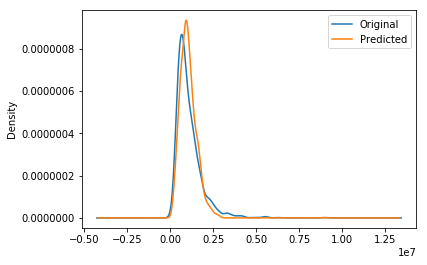

In [13]:
prediction_graph = pd.DataFrame({'Original':y_tes,'Predicted':y_pred})
prediction_graph.plot(kind='density',sharex=True)

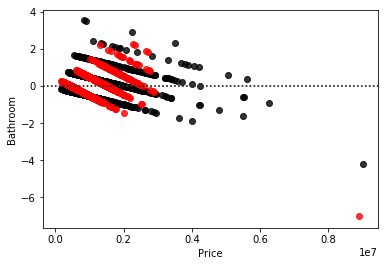

In [14]:
sns.residplot(y_tes,x_tes['Bathroom'],color='black',label='Actual data')
sns.residplot(y_pred,x_tes['Bathroom'],color='Red',label='fitted data')

In [15]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_tes, y_pred))  
print('R2:', metrics.r2_score(y_tes,y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_tes, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_tes, y_pred))) 

Mean Absolute Error: 321253.88628031535
R2: 0.42996652660292256
Mean Squared Error: 310333397828.5698
Root Mean Squared Error: 557075.7559152703


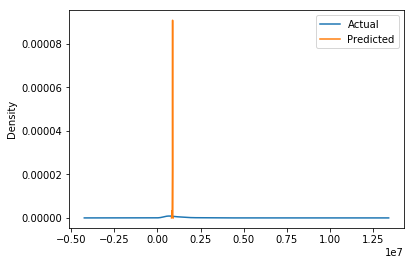

In [16]:
from sklearn.svm import SVR
rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
y_rbf = rbf.fit(x_tr, y_tr).predict(x_tes)
#print(y_rbf)
ndf = pd.DataFrame({'Actual': y_tes, 'Predicted': y_rbf})
ndf.plot(kind='density',sharex=True)

In [17]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_tes, y_rbf))  
print('R2:', metrics.r2_score(y_tes,y_rbf))
print('Mean Squared Error:', metrics.mean_squared_error(y_tes, y_rbf))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_tes, y_rbf)))

Mean Absolute Error: 479383.5696818316
R2: -0.07793901584284457
Mean Squared Error: 586843568053.8923
Root Mean Squared Error: 766057.1571716384
